In [30]:
# Init. This code snippet should be hidden in final output.
img_folder = '30_Correlation'
img_path = './' + img_folder + '/'

# setup vector for latex
from matplotlib.pyplot import *
%matplotlib inline 
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('png', 'pdf')

In [31]:
# Init. This code snippet should be hidden in final output.
img_folder = '30_Correlation'
img_path = './' + img_folder + '/'

# setup vector for latex
from matplotlib.pyplot import *
%matplotlib inline 
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('png', 'pdf')

#### Case 1 : Perfectly positively linearly related dataset (whew!)
Suppose we have such a case as below. you could note, this is of line $y=2x$
  
* X = 1,2,3,4,5,6  
* Y = 2,4,6,8,10,12  

Then, every possible rectangle for each pair of $[ (x_i, y_i) , (x_j,y_j) ]$ is tabulated below. This illustrates the redundancy better. Note the repetitive values symmetrically spread from the diagonal lines. The color gradient gives a better perspective of the spread. The actual plot of the sample set is given on the right side. 

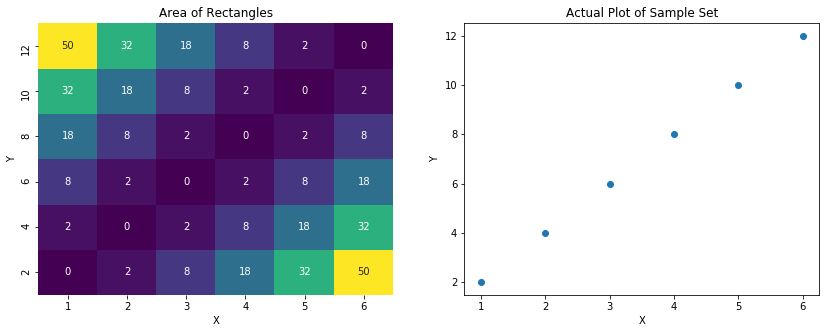

In [32]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

X , Y = [1,2,3,4,5,6],[2,4,6,8,10,12]

def plot_recs(X, Y):
    N = len(X)
    df = pd.DataFrame(columns=range(0,len(X)+1))
    matrix = np.empty(shape=[len(Y), len(X)])  # first creating a 2D numpy array

    comb_l = sorted(zip(X,Y), key=lambda x: x[1])  #sorting w.r.t Y
    for i in range(0,N):  # equivalent for i = 1 to N because, range is 0 to N-1 and perfect for array indexing
        for j in range(0,N):        
            X1, Y1, X2, Y2 = comb_l[i][0], comb_l[i][1], comb_l[j][0], comb_l[j][1]    
            d1, d2 = X2 - X1, Y2 - Y1  # can be otherway also as anyway d1*d2 next    
            matrix[i,j] = (d1*d2)   

    df = pd.DataFrame(matrix, columns=range(1,len(X)+1))  # columns start from 1 to length of X
    df.index = Y  # make index start from 1
    df.index.name='X'
    df.columns.name = df.index.name  
    df.index.name = None
    df = df.astype(int) # converting all to integer from float

    # pandas styling cannot be exported to latex so we need to transfer to plotting platforms..
    # ref: https://stackoverflow.com/questions/37790429/seaborn-heatmap-using-pandas-dataframe
    import seaborn as sns
    fig, axr = plt.subplots(1,2,figsize=(14,5))
    
    ax = axr[0]
    sns.heatmap(df, annot=True, cmap='viridis', ax = ax, cbar=False) 
    ax.set_title('Area of Rectangles')
    ax.set_ylabel('Y')
    ax.invert_yaxis()
    
    ax = axr[1]
#     ax.plot(X,Y)
    ax.scatter(X,Y)
    ax.set_ylabel('Y')
    ax.set_xlabel('X')
    ax.set_title('Actual Plot of Sample Set')
    plt.show()
    
plot_recs(X,Y)

Using $\ref{eq:C002}$ or $\ref{eq:C003}$, TIA for given sample set, turns out to be $210$

In [33]:
X , Y= [1,2,3,4,5,6],[2,4,6,8,10,12]
N = len(X)

def get_TIA(X,Y):
    N = len(X)
    comb_l, area = sorted(zip(X,Y), key=lambda x: x[1]), 0  #sorting w.r.t Y
    for i in range(0,N):  # equivalent for i = 1 to N because, range is 0 to N-1
        for j in range(i+1,N):        
            X1, Y1, X2, Y2 = comb_l[i][0], comb_l[i][1], comb_l[j][0], comb_l[j][1]    
            d1, d2 = X2 - X1, Y2 - Y1  
            area += d1*d2   
    return area

print(get_TIA(X,Y))

210


#### Case 2 : Perfectly negatively linearly related dataset

Suppose we have such a case as below. you could note, this is of line $y=14 - 2x$
  
* X = 1,2,3,4,5,6  
* Y = 12,10,8,6,4,2  

For this, let us check the rectangles' area. 

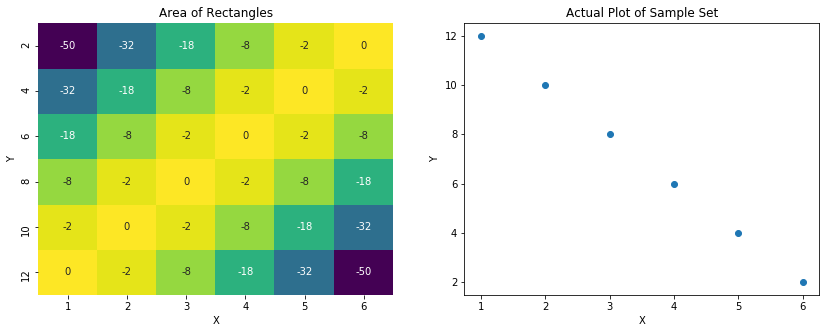

In [34]:
X , Y = [1,2,3,4,5,6],[12,10,8,6,4,2]

plot_recs(X,Y)

We see something interesting here. If you might have thought, some way the rectangular area also represented actual plot could notice it here that the area plot on left hand side is still similarly symmetrical as before, even though the plot is perfectly negatively related as shown on RHS. This is because, that was its definition in first place. The rectangular area plot on LHW just gives a measure of the spread of relationship, while the plot on RHS represents the actual location. Also note, that again, due to symmetry, we have duplicate values, thus suggesting to halve the measure. And the values are negative. This is good, now that could help to indicate our sample sets are negatively linearity related. Let us check out the TIA. 

In [35]:
X , Y= [1,2,3,4,5,6],[12,10,8,6,4,2]
print(get_TIA(X,Y))

-210


Its negative. We are already getting somewhere! Let us consider another case, where there is no linear relationship. 

#### Case 3 : Dataset with no linear relationship
Suppose we have such a case as below. 
  
* X = 1,2,3,4,5,6  
* Y = 12,10,8,8,10,12  

The respective rectangle area and plots are as below. 

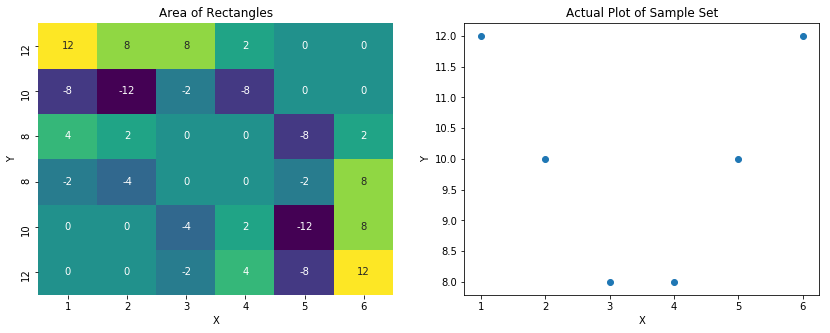

In [36]:
X , Y = [1,2,3,4,5,6],[12,10,8,8,10,12]

plot_recs(X,Y)

Again, irrespective of actual plot, the area graph on LHS, is still symmetrical if you look carefully, assuring, no matter what, the measure is available in doubled quantity across all possible rectangles, so good golly gosh, we chose half of the rectangles. Note the RHS plot, there is clearly not a possibility of a best fit linearity between X and Y, and this should reflect in our measure. Let us calculate the TIA. 

In [37]:
X , Y = [1,2,3,4,5,6],[12,10,8,8,10,12]
print(get_TIA(X,Y))

0


Understandly it is 0. The no linear relationship in a literal sense has been transformed to a number via our TIA. Recall, 

* for a perfectly positively linearly related dataset, we got +210
* for a perfectly negatively linearly related dataset, we got -210
* for a perfectly not linearly related dataset, we got 0  

Thus our TIA is already proving to be a good measure. Note that, if we had taken all rectangles and getting 420,-420,0 instead, it would be an unnecessarily doubled stretch, giving a doubled sense of actual linearly underneath. By halving the area, that is via TIA, we have taken the linearity sense in a kind of _same_ scale of what it is. 

#### Case 4: A practical realistic dataset

Suppose we have such a case as below. 
  
* X = 2.2, 2.7, 3, 3.55, 4, 4.5, 4.75, 5.5
* Y = 14, 23, 13, 22, 15, 20, 28 , 23

The respective rectangle area and plots are as below. 

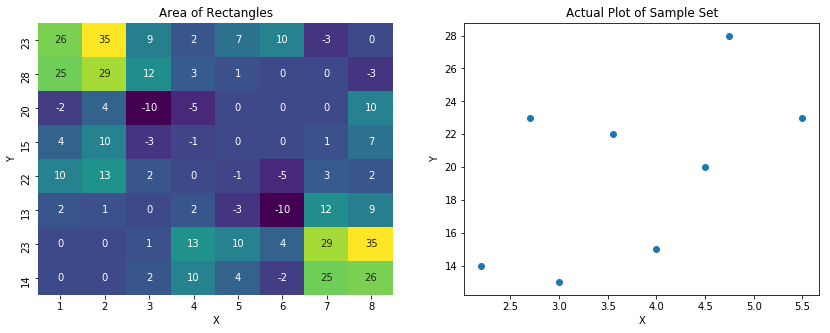

In [38]:
X , Y = [2.2, 2.7, 3, 3.55, 4, 4.5, 4.75, 5.5],[ 14, 23, 13, 22, 15, 20, 28 , 23]
plot_recs(X,Y)

You see, even for a realistic sample set which has some linearity associated in either direction (positive or negative), the LHS area diagram has a symmetry as usual. This would always be the case, thus we are right in taking the half no of  rectangles, no matter what the linearity is. Proceeding to TIA, we get it as 

In [39]:
X , Y = [2.2, 2.7, 3, 3.55, 4, 4.5, 4.75, 5.5],[ 14, 23, 13, 22, 15, 20, 28 , 23]
print(get_TIA(X,Y))

184.39999999999995
